In [3]:

import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sellers'),
    ('products.csv', 'products'),
    ('geolocation.csv', 'geolocation'),
    ('payments.csv', 'payments'),
    ('order_items.csv','order_items')# Added payments.csv for specific handling
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Pratik123',
    database='ecommerce'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = 'E:\ecommerce'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()


Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Processing orders.csv
NaN values before replacement:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Processing sellers.csv
NaN values before replacement:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Processing products.csv
NaN values before replacement:
product_id                      0
product category              610
product_name_length           610
product_description_length    610
product_photos_qty            610
prod

In [3]:
pip install mysql-connector-python

   ---------------------------------------- 0.0/14.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.3 MB 653.6 kB/s eta 0:00:22
   ---------------------------------------- 0.1/14.3 MB 1.1 MB/s eta 0:00:14
    --------------------------------------- 0.2/14.3 MB 1.5 MB/s eta 0:00:10
    --------------------------------------- 0.3/14.3 MB 1.5 MB/s eta 0:00:10
   - -------------------------------------- 0.4/14.3 MB 1.4 MB/s eta 0:00:10
   - -------------------------------------- 0.5/14.3 MB 1.7 MB/s eta 0:00:09
   - -------------------------------------- 0.6/14.3 MB 1.6 MB/s eta 0:00:09
   - -------------------------------------- 0.7/14.3 MB 1.7 MB/s eta 0:00:08
   - -------------------------------------- 0.7/14.3 MB 1.7 MB/s eta 0:00:08
   -- ------------------------------------- 0.9/14.3 MB 1.9 MB/s eta 0:00:08
   -- ------------------------------------- 0.9/14.3 MB 1.8 MB/s eta 0:00:08
   --- ----

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

db=mysql.connector.connect(host="localhost",
                           username="root",
                           password="12345",
                           database="ecommerce")

cur=db.cursor()

# List all unique cities where customers are located

In [43]:
query=""" select distinct customer_city from customers """

cur.execute(query)
data=cur.fetchall()
data
df=pd.DataFrame(data)
df.head()

,0
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas


# count the number of orders placed in 2017 

In [7]:
query=""" select count(order_id) from orders where year(order_purchase_timestamp)=2017 """

cur.execute(query)
data=cur.fetchall()
data

[(180404,)]

# find the total sales per category

In [19]:
query="""select products.product_category category,
round(sum(payments.payment_value),2) sales
from products join order_items
on products.product_id=order_items.product_id
join payments
on payments.order_id=order_items.order_id
group by category
"""

cur.execute(query)
data=cur.fetchall()
data
df=pd.DataFrame(data,columns=["category","sales"])
df

,category,sales
0,Art,371915.16
1,Cool Stuff,9356376.00
2,Games consoles,2345764.55
3,telephony,5842584.61
4,sport leisure,16705530.71
...,...,...
69,cds music dvds,14393.16
70,La Cuisine,34962.36
71,Fashion Children's Clothing,9428.04
72,PC Gamer,26093.16


# Calculate the percentage of orders that were paid in installments

In [24]:
query=""" select (sum(case when payment_installments >=1 then 1
else 0 end))/count(*)*100 from payments
"""

cur.execute(query)
data=cur.fetchall()
data

[(Decimal('99.9981'),)]

# Count the number of customers from each state

<BarContainer object of 27 artists>

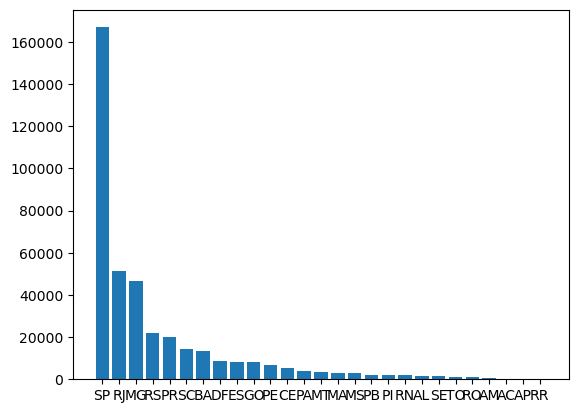

In [39]:
query=""" select customer_state, count(customer_id)
from customers group by customer_state
"""

cur.execute(query)
data=cur.fetchall()
data
df=pd.DataFrame(data,columns=["state","cust_id"])
df=df.sort_values(by="cust_id",ascending=False)
plt.bar(df["state"],df["cust_id"])

# Calculate The Number of Orders per Month In 2018

[Text(0, 0, ''),
 Text(0, 0, '26912'),
 Text(0, 0, '28844'),
 Text(0, 0, '27756'),
 Text(0, 0, '27492'),
 Text(0, 0, '24668'),
 Text(0, 0, '25168'),
 Text(0, 0, '26048'),
 Text(0, 0, '64'),
 Text(0, 0, '16')]

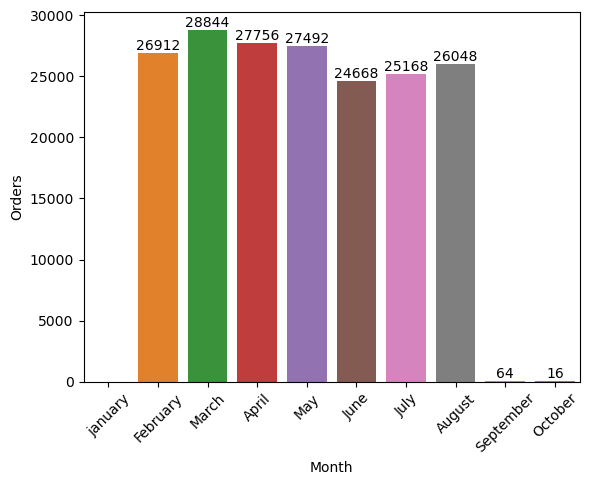

In [11]:
query=""" select monthname(order_purchase_timestamp) months,count(order_id) order_count 
from orders where year(order_purchase_timestamp)=2018
group by months
"""

cur.execute(query)
data=cur.fetchall()
data
df=pd.DataFrame(data,columns=["Month","Orders"])
o=["january","February","March","April","May","June","July","August","September","October"]
ax=sns.barplot(x=df["Month"],y=df["Orders"],data=df,order=o)
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0])
#plt.bar(df["Month"],df["Orders"])


# find the average number of products per order,grouped by customer city.

In [20]:
query=""" with count_per_order as
(select orders.order_id,orders.customer_id, count(order_items.order_id) as oc
from orders join order_items
on orders.order_id=order_items.order_id
group by orders.order_id,orders.customer_id)

select customers.customer_city, avg(count_per_order.oc)
from customers join count_per_order
on customers.customer_id=count_per_order.customer_id
group by customers.customer_city;
"""

cur.execute(query)
data=cur.fetchall()
data
df=pd.DataFrame(data,columns=["customer city","average products"])
df.head(10)

,customer city,average products
0,treze tilias,5.0909
1,indaial,4.4615
2,sao jose dos campos,4.5539
3,sao paulo,4.6249
4,porto alegre,4.6997
5,santos,4.6459
6,sao francisco do sul,4.9412
7,sao vicente,4.3636
8,joinville,4.4106
9,sao vendelino,4.0000


# Calculate the percentage of total revenue contributed by each product category

In [13]:
query=""" select upper(products.product_category) category,
round((sum(payments.payment_value)/(select sum(payment_value) from payments))*100,2) sales_percent
from products join order_items
on products.product_id=order_items.product_id
join payments
on payments.order_id=order_items.order_id
group by category order by sales_percent desc;
"""

cur.execute(query)
data=cur.fetchall()
data
df=pd.DataFrame(data,columns=["Category","sales_percent"])
df.head()

,Category,sales_percent
0,BED TABLE BATH,42.79
1,HEALTH BEAUTY,41.41
2,COMPUTER ACCESSORIES,39.61
3,FURNITURE DECORATION,35.73
4,WATCHES PRESENT,35.71


# Identify the corelation between product price and the number of times a product has been purchased

In [23]:
query=""" select products.product_category,
count(order_items.product_id),
round(avg(order_items.price),2)
from products join order_items
on products.product_id=order_items.product_id
group by products.product_category;
"""

cur.execute(query)
data=cur.fetchall()
data
df=pd.DataFrame(data,columns=["Category","order_count","Price"])
arr1=df["order_count"]
arr2=df["Price"]
a=np.corrcoef([arr1,arr2])
#there is no impact of orders on product
print("The corelation between product price and the number of times a product has been purchased¶ is",a)

array([[ 1.        , -0.10631514],
       [-0.10631514,  1.        ]])

# Calculate the Total revenue generated by each seller ,and rank them by revenue

In [29]:
query=""" select *, dense_rank() over(order by revenue desc) as rn from
(select order_items.seller_id,sum(payments.payment_value)
revenue from order_items join payments
on order_items.order_id=payments.order_id
group by order_items.seller_id) as a;
"""

cur.execute(query)
data=cur.fetchall()
data
df=pd.DataFrame(data,columns=["seller_id","revenue","rank"]) 
df.head()

,seller_id,revenue,rank
0,7c67e1448b00f6e969d365cea6b010ab,1.521501e+06,1
1,1025f0e2d44d7041d6cf58b6550e0bfa,9.246661e+05,2
2,4a3ca9315b744ce9f8e9374361493884,9.037358e+05,3
3,1f50f920176fa81dab994f9023523100,8.707603e+05,4
4,53243585a1d6dc2643021fd1853d8905,8.547092e+05,5


# Calculate the moving average of order values for each customer over their order history

In [8]:
query=""" select customer_id,order_purchase_timestamp,payment,
avg(payment) over(partition by customer_id order by order_purchase_timestamp
rows between 2 preceding and current row) as mov_avg
from
(select orders.customer_id,orders.order_purchase_timestamp,
payments.payment_value as payment
from payments join orders
on payments.order_id=orders.order_id) as a;;
"""

cur.execute(query)
data=cur.fetchall()
data
df=pd.DataFrame(data)
df

,0,1,2,3
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
2,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
3,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
4,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
...,...,...,...,...
1246627,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
1246628,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
1246629,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
1246630,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001


# Calculate the cumulative sales per month for each year.

In [15]:
query=""" select years, months, payment, sum( payment)
over(order by years, months) cumulative_sales from
(select year(orders.order_purchase_timestamp) as years,
month(orders.order_purchase_timestamp) as months,
round(sum(payments.payment_value),2) as payment from orders join payments
on orders.order_id=payments.order_id
group by years, months order by years, months) as a;
"""

cur.execute(query)
data=cur.fetchall()
data
df=pd.DataFrame(data)
df.head()

,0,1,2,3
0,2016,9,3026.88,3026.88
1,2016,10,709085.76,712112.64
2,2016,12,235.44,712348.08
3,2017,1,1661856.48,2374204.56
4,2017,2,3502896.11,5877100.67


# Calculate the Year-over-Year growth rate of total sales

In [19]:
query=""" select year(orders.order_purchase_timestamp) as years,
round(sum(payments.payment_value),2) as payment from orders join payments
on orders.order_id=payments.order_id
group by years order by years;
"""

cur.execute(query)
data=cur.fetchall()
data
df=pd.DataFrame(data,columns=["years","Sales"])
df

,years,Sales
0,2016,7.123481e+05
1,2017,8.699696e+07
2,2018,1.043972e+08


#  Identify the top 3 customers who spent the most money in each year

In [11]:
query="""select years, customer_id, payment,d_rank
from
(select year(orders.order_purchase_timestamp) years,
orders.customer_id,
sum(payments.payment_value) payment,
dense_rank() over(partition by year(orders.order_purchase_timestamp)
order by sum(payments.payment_value) desc) d_rank
from orders join payments
on payments.order_id=orders.order_id
group by year(orders.order_purchase_timestamp),
orders.customer_id) as a
where d_rank <= 3;"""

cur.execute(query)
data=cur.fetchall()
data
df=pd.DataFrame(data,columns=["years","ID","Payments","Rank"])
df


,years,ID,Payments,Rank
0,2016,a9dc96b027d1252bbac0a9b72d837fc6,17082.600586,1
1,2016,1d34ed25963d5aae4cf3d7f3a4cda173,16808.879883,2
2,2016,4a06381959b6670756de02e07b83815f,14733.360352,3
3,2017,1617b1357756262bfa56ab541c47bc16,163968.960938,1
4,2017,c6e2731c5b391845f6800c97401a43a9,83151.720703,2
5,2017,3fd6777bbce08a352fddd04e4a7cc8f6,80719.921875,3
6,2018,ec5b2ba62e574342386871631fafd3fc,87298.558594,1
7,2018,f48d464a0baaea338cb25f816991ab1f,83066.519531,2
8,2018,e0a2412720e9ea4f26c1ac985f6a7358,57713.279297,3
